# Insight Needed on
1) Is there a significant difference in the median value of houses bounded by the Charles river or not?

2) Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3) Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


# dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [77]:
# import Libraries and Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# For the "Median value of owner-occupied homes" provide a boxplot

[Text(0, 0.5, ' Median Value of Owner-Occupied Homes'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot of MEDV')]

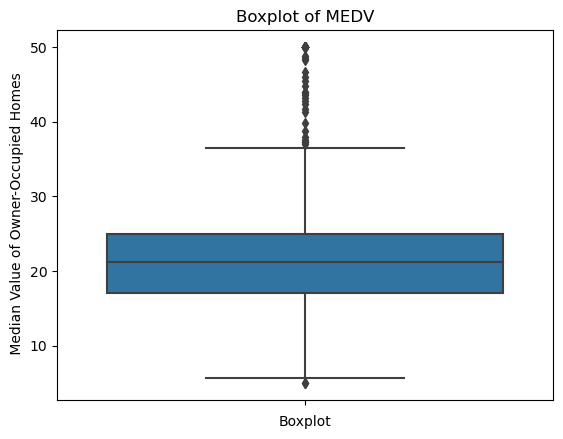

In [4]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set(ylabel =  ' Median Value of Owner-Occupied Homes', xlabel = 'Boxplot', title = 'Boxplot of MEDV')

# Conclusions from Box Plot 
1) One can see typical boxplot for the given data with equal whiskers length. i.e max and min lengths 
of the whiskers are cut-off to 1.5*IQR
2) Hence, can see many Outlier Data points above 75%
3) Median of the data is slightly greater than 20

# Provide a  bar plot for the Charles river variable

In [17]:
boston_df['CHAS'].describe()
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

[Text(0.5, 0, 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0, 0.5, 'Count of Values'),
 Text(0.5, 1.0, 'Bar plot of Charles River Variable')]

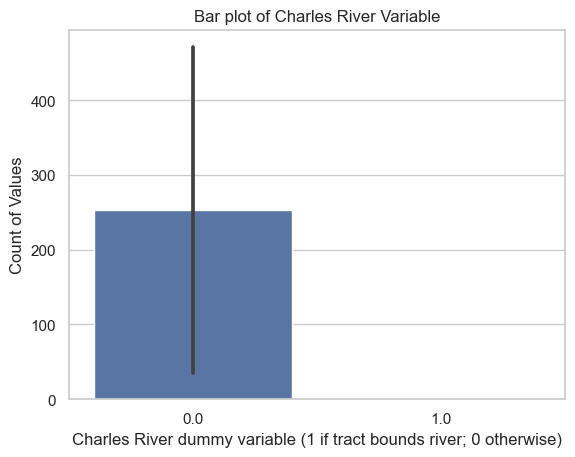

In [42]:
sns.set(style="whitegrid")
bp = sns.barplot(x = 'CHAS', y = boston_df['CHAS'].value_counts(), data = boston_df)
bp.set(xlabel = 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)', ylabel = 'Count of Values', 
       title = 'Bar plot of Charles River Variable')

# Barplot observations
Chart shows most of the tracs are river bounded.

# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [45]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [68]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <70), 'age_group'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 75, 'age_group'] = '70 years and older'

[Text(0.5, 0, 'AGE Variable'),
 Text(0, 0.5, 'MEDV'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')]

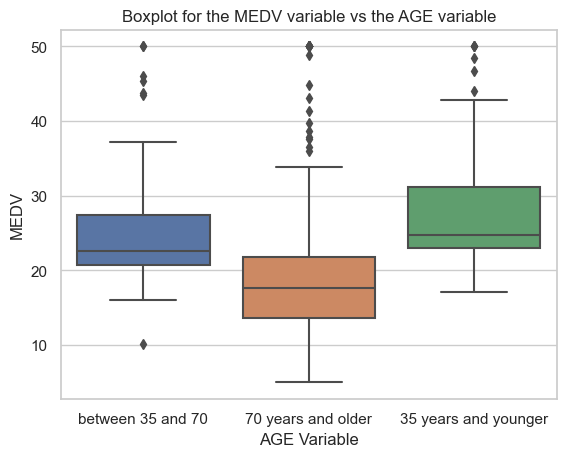

In [52]:
sns.set(style = 'whitegrid')
box_medv_age = sns.boxplot(y = 'MEDV', x = 'age_group', data = boston_df)
box_medv_age.set(xlabel = "AGE Variable", ylabel = 'MEDV', title = 'Boxplot for the MEDV variable vs the AGE variable')


# Boxplot Observations
1) Median of MEDV is close to 25 for "35 and younger" age group
2) Median of MEDV is close to 22 for age group "between 35 and 70"
3) Median of MEDV is close to 18 for agr group "70 years and older"
4) 70 years and older age group has lowest MEDV value, and more outlier data compared to other groups

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

[Text(0, 0.5, 'Nitric Oxide Concentrations'),
 Text(0.5, 0, 'Proportion of non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Scatter Plot of Nitric Oxide Concentrations vs Proportion of non-Retail Business Acres per Town')]

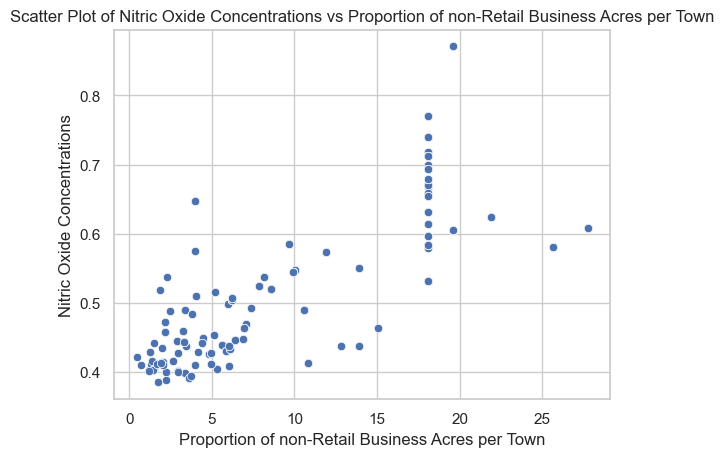

In [75]:
sns.set(style = "whitegrid")
sns.scatterplot(x= "INDUS", y = 'NOX', data = boston_df).set(ylabel = 
                                                             'Nitric Oxide Concentrations', xlabel = 
    'Proportion of non-Retail Business Acres per Town', 
                                                             title = 'Scatter Plot of Nitric Oxide Concentrations vs Proportion of non-Retail Business Acres per Town' )


# Observations
We can see almost linear relationship between these two variable.

# Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio')]

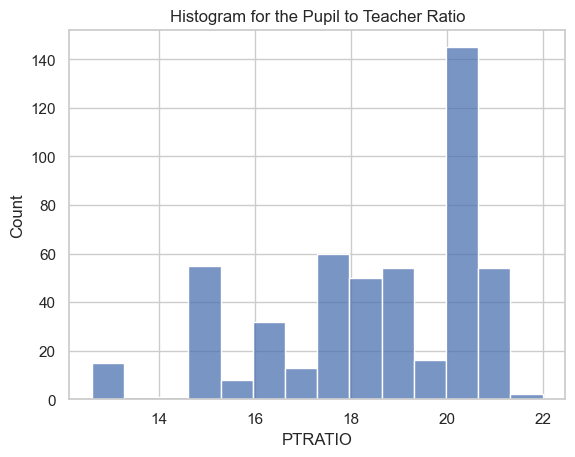

In [61]:
sns.set(style = 'whitegrid')
sns.histplot(boston_df['PTRATIO']).set(title = "Histogram for the Pupil to Teacher Ratio")


# Observation
We can see the ratio count is maximum for 20-22 group.

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

H0: µ1 = µ2 ("there is no difference in median value of houses bounded by the Charles river")
H1: µ1 ≠ µ2 ("there is a difference in median value of houses bounded by the Charles river")
Using α = 0.05

In [65]:
# Using Levene's function to check equal or unequal variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

pvalue is less than 0.05, hence, equal_var = False

In [66]:
#Running t.test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

# Conclusion
pvalue is < 0.05, Hence Null Hypothesis is rejected. Therefore from the test we can conclude that there is a significant difference in median value of houses bounded by the Charles River and houses not bounded by the Charles River.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

H0: µ1 = µ2 = µ3 three populations means are equal
H1: at least one of them are different

Using α = 0.05

In [70]:
#age groups have been created already in the earlier task
#Running f_oneway function to perforn the test
#testing equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.5626395868356187, pvalue=0.07815771233599983)

p_value is > 0.05. Therefore, equal_var = True

In [74]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 39.48680546865226, P-Value: 1.3377777392035556e-16


Since p_values is less than 0.05, null hypothesis is rejected. There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1:There is a relation between these two variables

Taking α = 0.05

Since both the variables are continuous using Pearson Correlation:

In [76]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

Since the p_value is less than 0.05, null hypothesis is rejected. We can conclude that there is a relation between Nitric oxide concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes(MEDV)? (Regression analysis)
Dependednt variable Y = MEDV
Exploratory variable X = DIS

Hypothesis:

H_0: β1= 0 (additional weighted distance to the five Boston employment centres (DIS) has no impact on median value of owner occupied homes(MEDV))
H_1: β1 is not equal to 0 (DIS has an impact on MEDV)


In [79]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        18:28:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p_value is less than 0.05. We reject null hypothesis. i.e. additional weighted distance to the five Boston employment centres (DIS) has an impact on median value of owner occupied homes(MEDV). 